In [1]:
# read a.txt into a list
with open('raw_rowpress_bitflips.txt') as f:
    a = f.readlines()

import pandas as pd

# create empty dataframe
df = pd.DataFrame(columns=['acts', 'reads', 'covered_rows', 'bitflips'])

for i in range(0, len(a), 3):
    # remove newline from string
    a[i] = a[i].rstrip()
    a[i+1] = a[i+1].rstrip()
    a[i+2] = a[i+2].rstrip()

    no_acts = int(a[i].split(' ')[6])
    no_reads = int(a[i].split(' ')[11])

    no_rows_covered = int(a[i+1].split(' ')[6])
    no_bitflips = int(a[i+2].split(' ')[4])

    # append these to the dataframe, use pandas concat
    df = pd.concat([df, pd.DataFrame([[no_acts, no_reads, no_rows_covered, no_bitflips]], columns=['acts', 'reads', 'covered_rows', 'bitflips'])])

df

    

,acts,reads,covered_rows,bitflips
0,1,1,0,0
0,1,2,0,0
0,1,4,0,0
0,1,8,0,0
0,1,16,0,0
0,1,32,0,0
0,1,48,0,0
0,1,64,0,0
0,1,80,0,0
0,1,128,0,0


/tmp/ipykernel_329687/2196802407.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-deep')


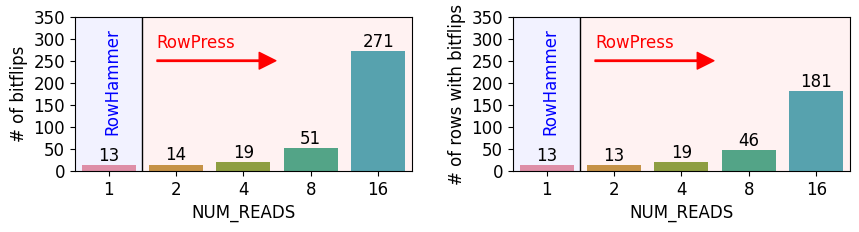

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
# use seaborn theme
plt.style.use('seaborn-deep')

plt.rcParams.update({'font.size': 12})
# seaborn barplot number of bitflips and coverage in two plots vs number of reads where acts = 4
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 2), sharey = 'row')
# seperate subplots from each other
fig.subplots_adjust(wspace=0.3)
# seaborn barplot number of bitflips and coverage in two plots vs number of reads where acts = 4
sns.barplot(data=df[df['acts'] == 4], x='reads', y='bitflips', ax=axs[0])
sns.barplot(data=df[df['acts'] == 4], x='reads', y='covered_rows', ax=axs[1])
# draw y ticks every 50 
axs[0].set_yticks(range(0, 351, 50))
# draw the y tick at 300 too

# label data points except the last one
for i in range(0, 5):
    axs[0].text(i, df[df['acts'] == 4].iloc[i]['bitflips'] + 10, df[df['acts'] == 4].iloc[i]['bitflips'], color='black', ha="center")
    axs[1].text(i, df[df['acts'] == 4].iloc[i]['covered_rows'] + 10, df[df['acts'] == 4].iloc[i]['covered_rows'], color='black', ha="center")
# rename x axis
axs[0].set_xlabel('NUM_READS')
axs[1].set_xlabel('NUM_READS')
# rename y axis
axs[0].set_ylabel('# of bitflips')
axs[1].set_ylabel('# of rows with bitflips')

axs[1].tick_params(axis='y', labelleft=True)

# draw x axis until 4
axs[0].set_xlim(-0.5, 4.5)
axs[1].set_xlim(-0.5, 4.5)

# draw a vertical line between the first and the second bars
axs[0].axvline(x=0.5, color='black', linewidth=1)
axs[1].axvline(x=0.5, color='black', linewidth=1)

# add text above the first bar "RowHammer" rotated
axs[0].text(0.05, 90, 'RowHammer', rotation=90, color='blue', ha="center")
axs[1].text(0.05, 90, 'RowHammer', rotation=90, color='blue', ha="center")

# paint the area behind the first bar blue
axs[0].axvspan(-0.5, 0.5, facecolor='blue', alpha=0.05)
axs[1].axvspan(-0.5, 0.5, facecolor='blue', alpha=0.05)

# add text above the second bar "RowPress" rotated
axs[0].text(1.3, 280, 'RowPress', color='red', ha="center")
axs[1].text(1.3, 280, 'RowPress', color='red', ha="center")

# add an arrow pointing right to the second bar, make the arrow smaller
axs[0].annotate('', xy=(2.2, 250), xytext=(0.7, 250), arrowprops=dict(facecolor='red', shrink=0.01, width = 1, edgecolor='red'))
axs[1].annotate('', xy=(2.2, 250), xytext=(0.7, 250), arrowprops=dict(facecolor='red', shrink=0.01, width = 1, edgecolor='red'))

# paint the area behind the second bar blue
axs[0].axvspan(0.5, 4.5, facecolor='red', alpha=0.05)
axs[1].axvspan(0.5, 4.5, facecolor='red', alpha=0.05)



# save figure
plt.savefig('../../plots/rowpress_bitflips.pdf', bbox_inches='tight')
